# PUBG - FINISH PLACEMENT PREDICTION

<img src="Introduction.jpg">

### So, where we droppin' boys and girls?
### Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all while the play zone continues to shrink.
### PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies sold, it's the fifth best selling game of all time, and has millions of active monthly players.
### We are given over 65,000 games' worth of anonymized player data, split into training and testing sets, and asked to predict final placement from final in-game stats and initial player ratings.

### What's the best strategy to win in PUBG? Should we sit in one spot and hide your way into victory, or do you need to be the top shot? Let's let the data do the talking!




## Importing the required libraries before each step

In [1]:
import pandas as pd

In [2]:
#Reading the train and test data
train=pd.read_csv('train_V2.csv')
test=pd.read_csv('test_V2.csv')

In [3]:
#Combining both of them to clean everything at once
train['Split']='Train'
test['Split']='Test'
df=pd.concat([train,test], axis=0)

C:\Users\Devansh\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


## Data Cleaning, Wrangling and Analysis

In [4]:
df.head()

,DBNOs,Id,Split,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
0,0,7f96b2f878858a,Train,0,0,0.00,4d4b580de459be,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,0.4444,1466
1,0,eef90569b9d03c,Train,0,0,91.47,684d5656442f9e,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0.6400,0
2,0,1eaf90ac73de72,Train,1,0,68.00,6a4a42c3245a74,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0.7755,0
3,0,4616d365dd2853,Train,0,0,32.90,a930a9c79cd721,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0.1667,0
4,0,315c96c26c9aac,Train,0,0,100.00,de04010b3458dd,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0.1875,0


## Information about the data set


Data fields<br>
DBNOs - Number of enemy players knocked.<br>
assists - Number of enemy players this player damaged that were killed by teammates.<br>
boosts - Number of boost items used.<br>
damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.<br>
headshotKills - Number of enemy players killed with headshots.<br>
heals - Number of healing items used.<br>
Id - Player’s Id<br>
killPlace - Ranking in match of number of enemy players killed.<br>
killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.<br>
killStreaks - Max number of enemy players killed in a short amount of time.<br>
kills - Number of enemy players killed.<br>
longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.<br>
matchDuration - Duration of match in seconds.<br>
matchId - ID to identify match. There are no matches that are in both the training and testing set.<br>
matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
revives - Number of times this player revived teammates.<br>
rideDistance - Total distance traveled in vehicles measured in meters.<br>
roadKills - Number of kills while in a vehicle.<br>
swimDistance - Total distance traveled by swimming measured in meters.<br>
teamKills - Number of times this player killed a teammate.<br>
vehicleDestroys - Number of vehicles destroyed.<br>
walkDistance - Total distance traveled on foot measured in meters.<br>
weaponsAcquired - Number of weapons picked up.<br>
winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.<br>
groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.<br>
numGroups - Number of groups we have data for in the match.<br>
maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.<br>
winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.<br>

In [5]:
df.shape

(6381140, 30)

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
#This will include the non-numeric rows as well, for example - player id
df.describe(include="all")

,DBNOs,Id,Split,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
count,6381140.000,6381140,6381140,6381140.000,6381140.000,6381140.000,6381140,6381140.000,6381140.000,6381140.000,...,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,4446965.000,6381140.000
unique,nan,6381140,2,nan,nan,nan,2912983,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,3d3200d60c1feb,Train,nan,nan,nan,14d6b54cdec6bc,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,1,4446966,nan,nan,nan,74,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,0.657,NaN,NaN,0.233,1.106,130.421,NaN,0.227,1.366,47.664,...,0.164,601.531,0.003,4.508,0.024,0.008,1152.715,3.651,0.473,607.945
std,1.142,NaN,NaN,0.586,1.715,169.775,NaN,0.600,2.676,27.463,...,0.471,1491.292,0.073,30.430,0.167,0.092,1182.340,2.427,0.307,739.996
min,0.000,NaN,NaN,0.000,0.000,0.000,NaN,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,NaN,NaN,0.000,0.000,0.000,NaN,0.000,0.000,24.000,...,0.000,0.000,0.000,0.000,0.000,0.000,154.800,2.000,0.200,0.000
50%,0.000,NaN,NaN,0.000,0.000,84.240,NaN,0.000,0.000,47.000,...,0.000,0.000,0.000,0.000,0.000,0.000,683.700,3.000,0.458,0.000
75%,1.000,NaN,NaN,0.000,2.000,185.900,NaN,0.000,2.000,71.000,...,0.000,0.021,0.000,0.000,0.000,0.000,1974.000,5.000,0.741,1495.000


In [8]:
#This will remove '...' and show us all the columns
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,DBNOs,Id,Split,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchDuration,matchId,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
0,0,7f96b2f878858a,Train,0,0,0.000,4d4b580de459be,0,0,60,1241,0,0,0.000,1306,a10357fd1a4a91,squad-fpp,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,0.444,1466
1,0,eef90569b9d03c,Train,0,0,91.470,684d5656442f9e,0,0,57,0,0,0,0.000,1777,aeb375fc57110c,squad-fpp,26,25,1484,0,0.004,0,11.040,0,0,1434.000,5,0.640,0
2,0,1eaf90ac73de72,Train,1,0,68.000,6a4a42c3245a74,0,0,47,0,0,0,0.000,1318,110163d8bb94ae,duo,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0.775,0
3,0,4616d365dd2853,Train,0,0,32.900,a930a9c79cd721,0,0,75,0,0,0,0.000,1436,f1f1f4ef412d7e,squad-fpp,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0.167,0
4,0,315c96c26c9aac,Train,0,0,100.000,de04010b3458dd,0,0,45,0,1,1,58.530,1424,6dc8ff871e21e6,solo-fpp,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0.188,0


In [10]:
df.describe()

,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
count,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,6381140.000,4446965.000,6381140.000
mean,0.657,0.233,1.106,130.421,0.227,1.366,47.664,506.353,0.544,0.923,22.950,1578.611,44.621,43.128,890.604,0.164,601.531,0.003,4.508,0.024,0.008,1152.715,3.651,0.473,607.945
std,1.142,0.586,1.715,169.775,0.600,2.676,27.463,627.911,0.710,1.548,50.852,258.106,23.843,23.292,737.007,0.471,1491.292,0.073,30.430,0.167,0.092,1182.340,2.427,0.307,739.996
min,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,9.000,1.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,24.000,0.000,0.000,0.000,0.000,1367.000,28.000,27.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,154.800,2.000,0.200,0.000
50%,0.000,0.000,0.000,84.240,0.000,0.000,47.000,0.000,0.000,0.000,0.000,1438.000,30.000,30.000,1443.000,0.000,0.000,0.000,0.000,0.000,0.000,683.700,3.000,0.458,0.000
75%,1.000,0.000,2.000,185.900,0.000,2.000,71.000,1173.000,1.000,1.000,21.280,1850.000,49.000,47.000,1500.000,0.000,0.021,0.000,0.000,0.000,0.000,1974.000,5.000,0.741,1495.000
max,59.000,27.000,33.000,6616.000,64.000,80.000,101.000,2174.000,20.000,72.000,1094.000,2237.000,100.000,100.000,5910.000,39.000,40710.000,18.000,3823.000,12.000,5.000,25780.000,236.000,1.000,2013.000


In [11]:
df.isnull().sum()

DBNOs                    0
Id                       0
Split                    0
assists                  0
boosts                   0
damageDealt              0
groupId                  0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
killStreaks              0
kills                    0
longestKill              0
matchDuration            0
matchId                  0
matchType                0
maxPlace                 0
numGroups                0
rankPoints               0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPlacePerc       1934175
winPoints                0
dtype: int64

In [12]:
df.isna().sum()

DBNOs                    0
Id                       0
Split                    0
assists                  0
boosts                   0
damageDealt              0
groupId                  0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
killStreaks              0
kills                    0
longestKill              0
matchDuration            0
matchId                  0
matchType                0
maxPlace                 0
numGroups                0
rankPoints               0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPlacePerc       1934175
winPoints                0
dtype: int64

In [13]:
#Lets check whether the target variable is null for the training data
df[df.loc[df['Split'] == 'Train']['winPlacePerc'].isnull()]

C:\Users\Devansh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,DBNOs,Id,Split,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchDuration,matchId,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
2744604,0,f70c74418bb064,Train,0,0,0.000,12dfbede33f92b,0,0,1,0,0,0,0.000,9,224a123c53e008,solo-fpp,1,1,1574,0,0.000,0,0.000,0,0,0.000,0,nan,0


In [14]:
#This player has null target variable in train data thus deleting this player
df.drop(2744604, inplace=True)

### Data doesnt have any missing / null/ nan now

In [15]:
df.head()

,DBNOs,Id,Split,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchDuration,matchId,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
0,0,7f96b2f878858a,Train,0,0,0.000,4d4b580de459be,0,0,60,1241,0,0,0.000,1306,a10357fd1a4a91,squad-fpp,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,0.444,1466
1,0,eef90569b9d03c,Train,0,0,91.470,684d5656442f9e,0,0,57,0,0,0,0.000,1777,aeb375fc57110c,squad-fpp,26,25,1484,0,0.004,0,11.040,0,0,1434.000,5,0.640,0
2,0,1eaf90ac73de72,Train,1,0,68.000,6a4a42c3245a74,0,0,47,0,0,0,0.000,1318,110163d8bb94ae,duo,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0.775,0
3,0,4616d365dd2853,Train,0,0,32.900,a930a9c79cd721,0,0,75,0,0,0,0.000,1436,f1f1f4ef412d7e,squad-fpp,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0.167,0
4,0,315c96c26c9aac,Train,0,0,100.000,de04010b3458dd,0,0,45,0,1,1,58.530,1424,6dc8ff871e21e6,solo-fpp,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0.188,0


### Number of players in the match

In [16]:
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')

In [17]:
df.head()

,DBNOs,Id,Split,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchDuration,matchId,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints,playersJoined
0,0,7f96b2f878858a,Train,0,0,0.000,4d4b580de459be,0,0,60,1241,0,0,0.000,1306,a10357fd1a4a91,squad-fpp,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,0.444,1466,96
1,0,eef90569b9d03c,Train,0,0,91.470,684d5656442f9e,0,0,57,0,0,0,0.000,1777,aeb375fc57110c,squad-fpp,26,25,1484,0,0.004,0,11.040,0,0,1434.000,5,0.640,0,91
2,0,1eaf90ac73de72,Train,1,0,68.000,6a4a42c3245a74,0,0,47,0,0,0,0.000,1318,110163d8bb94ae,duo,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0.775,0,98
3,0,4616d365dd2853,Train,0,0,32.900,a930a9c79cd721,0,0,75,0,0,0,0.000,1436,f1f1f4ef412d7e,squad-fpp,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0.167,0,91
4,0,315c96c26c9aac,Train,0,0,100.000,de04010b3458dd,0,0,45,0,1,1,58.530,1424,6dc8ff871e21e6,solo-fpp,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0.188,0,97


### Data Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

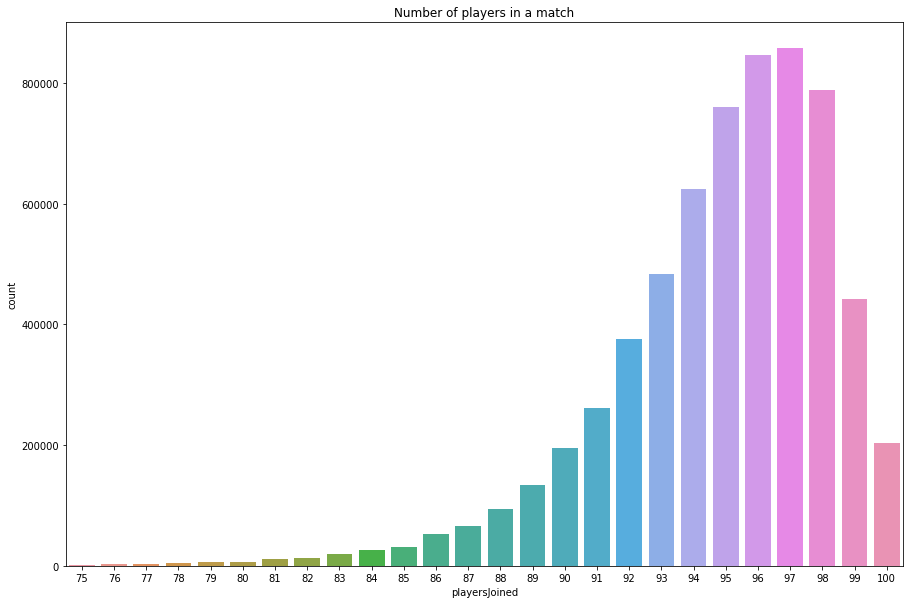

In [19]:
plt.figure(figsize=(15,10))
sns.countplot( df[df['playersJoined']>74]['playersJoined'])
plt.title('Number of players in a match')
plt.show()

Text(0.5, 1.0, 'Number of Weapons acquired by a player in a match')

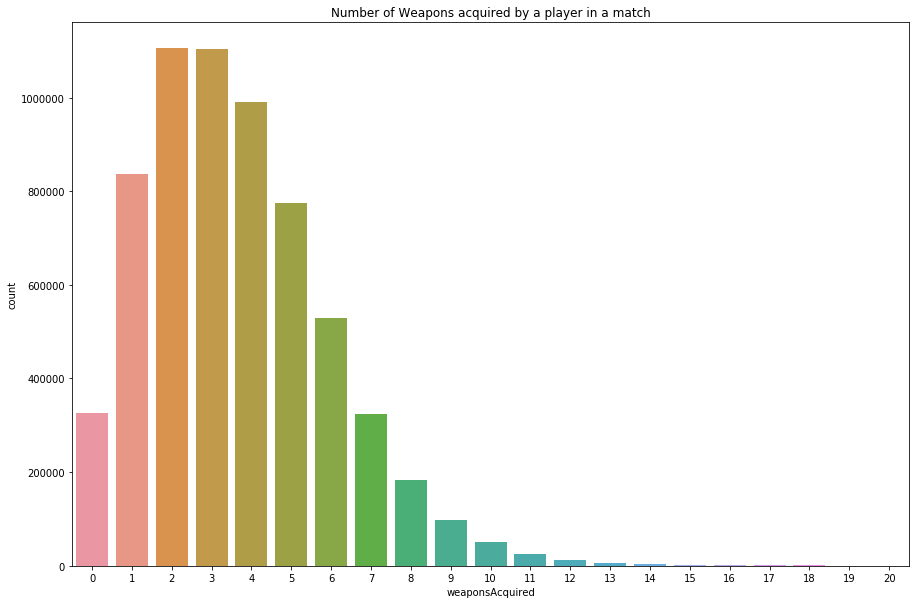

In [20]:
plt.figure(figsize=(15,10))
x=df[df['weaponsAcquired']<21]
sns.countplot(x='weaponsAcquired', data=x)
plt.title('Number of Weapons acquired by a player in a match')

### Maximum number of players have less than 20 weapons

## Lets combine heals and boosts to one variable

In [21]:
df['healsandboosts']=df['heals']+df['boosts']

## Combining all the distance variables and checking the killswithoutmoving (True or False)

In [22]:
df['totalDistance']=df['rideDistance']+df['walkDistance']+df['swimDistance']

In [23]:
df['killsWithoutMoving']=((df['kills'] > 0) & (df['totalDistance']==0))

Text(0.5, 1.0, 'Number of kills without moving in a match')

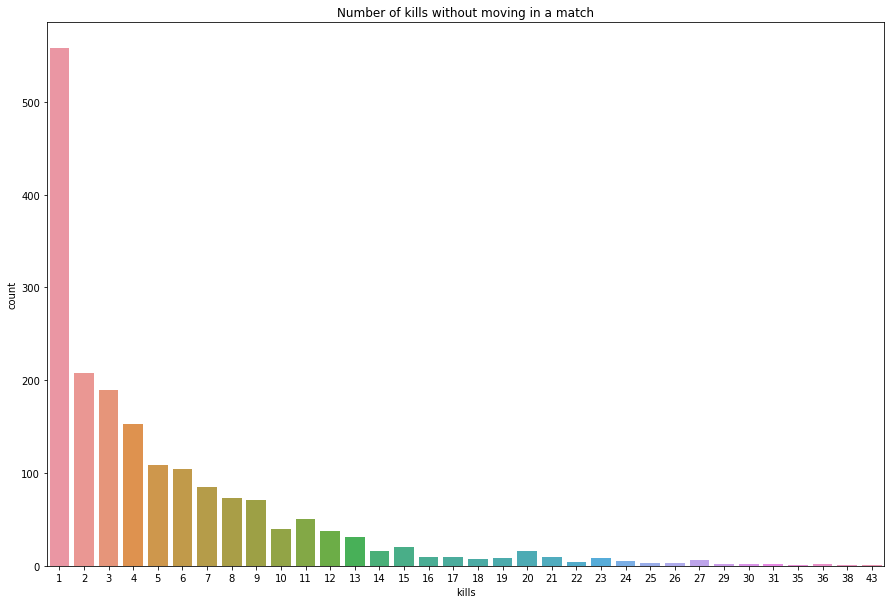

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(df[df['killsWithoutMoving'] ==True]['kills'])
plt.title('Number of kills without moving in a match')

In [25]:
print('Train: ', df[(df['killsWithoutMoving'] ==True) & (df['Split']=='Train')]['kills'].shape)
print('Test: ', df[(df['killsWithoutMoving'] ==True) & (df['Split']=='Test')]['kills'].shape)

Train:  (1535,)
Test:  (311,)


### 1846 players(Overall) and 1534 players in the train data killed others without moving? Hackers! Removing them!

In [26]:
df.drop(df[(df['killsWithoutMoving']==True) & (df['Split']=='Train')].index, inplace=True)

### Zero hackers in our train data now

In [27]:
print('Train: ', df[(df['killsWithoutMoving'] ==True) & (df['Split']=='Train')]['kills'].shape)
print('Test: ', df[(df['killsWithoutMoving'] ==True) & (df['Split']=='Test')]['kills'].shape)

Train:  (0,)
Test:  (311,)


## Let's check anomalies in road kills

In [28]:
df[['roadKills', 'rideDistance']].describe()

,roadKills,rideDistance
count,6378907.000,6378907.000
mean,0.003,601.687
std,0.073,1491.459
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,0.000,0.022
max,18.000,40710.000


In [29]:
#Maximum Road kills are 18, Lets check how many of each are there
df['roadKills'].value_counts()

0     6360419
1       16014
2        1815
3         425
4         114
5          54
6          29
7          18
8           7
11          4
9           3
10          2
18          1
15          1
14          1
Name: roadKills, dtype: int64

In [30]:
df[(df['rideDistance'] < 10) & (df['roadKills'] > 6) & (df['Split'] == 'Train')][['rideDistance', 'roadKills']]

,rideDistance,roadKills
471329,0.042,8
2733926,0.005,14


### These two are the reason why professional players get frustrated! Hackers!

In [31]:
df.drop([471329,2733926], inplace=True)

## Lets check anomalies in maximum kills by a player

In [32]:
df[(df['kills']>35) & (df['walkDistance']<50) & (df['Split']=='Train')][['kills', 'totalDistance']]

,kills,totalDistance
156599,48,23.710
672993,57,24.270
877113,37,37.860
1378200,41,46.710
1547547,36,39.970
2343424,38,34.960
2724641,45,8.777
3673965,55,12.190


### I wish even I could kill without travelling any distance

### It is possible that they were camping till the end / were born at where the game ends, but they're outliers anyway.

In [33]:
df.drop([156599,672993,877113,1378200,1547547, 2343424, 2724641, 3673965], inplace=True)

### Headshot Rate Anomaly detection

In [34]:
df['headshotRate']=df['headshotKills']/df['kills']

In [35]:
df['headshotRate']=df['headshotRate'].fillna(0)

C:\Users\Devansh\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Headshot kills Rate')

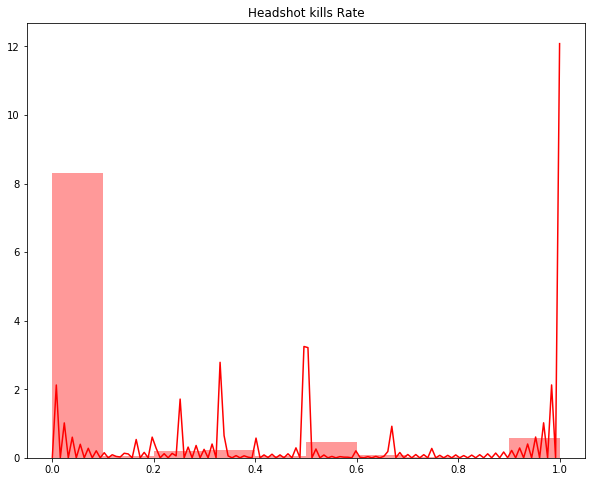

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(df[df['Split']=='Train'][['headshotRate']], bins=10, color='red')
plt.title('Headshot kills Rate')

## Let's see who's making a headshot every freaking time

In [37]:
df[(df['headshotRate'] == 1 ) & (df['kills'] > 12) & (df['Split'] == 'Train')][['headshotKills', 'kills', 'totalDistance']]

,headshotKills,kills,totalDistance
871244,13,13,2105.000
1483199,13,13,2479.800
1753322,15,15,5008.000
2256755,14,14,4994.000
2375749,14,14,2993.400
2825200,15,15,3274.000


### Either they are insane players or they are hackers. 'Outliers' are they coined anyway in our language

In [38]:
df.drop([871244,1483199,1753322,2256755,2375749,2825200], inplace=True)
#inplace=True means you're just performing the operation
#inplace=False means you need to assign the result to a new variable

In [39]:
test.shape

(1934174, 29)

In [40]:
df[df['Split']=='Test'].shape

(1933468, 35)

## Bullet travel distance?

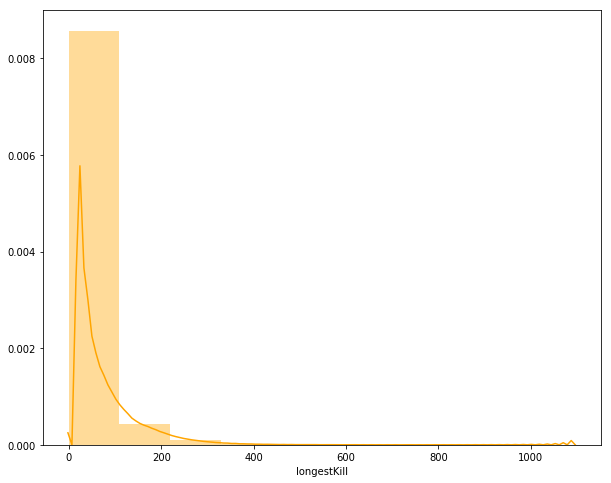

In [41]:
plt.figure(figsize=(10,8))
sns.distplot(df['longestKill'], bins=10, color='orange')
plt.show()

### The record for this is 6766 meters (Mentioned in the PUBG website) so according to that, a maximum of 1200 meters is possible. These are real professionals so I won't prefer removing them.

## Let's have a look at healing items and boosts used

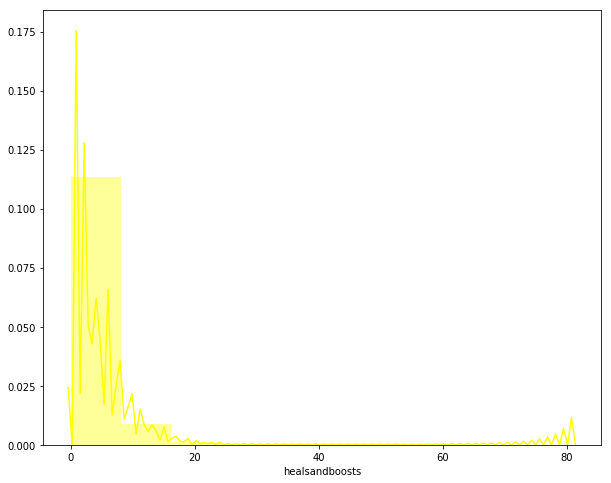

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(df['healsandboosts'], bins=10, color='yellow')
plt.show()

In [43]:
#80? Outliers!!
df[(df['healsandboosts'] > 75) & (df['Split']=='Train')][['healsandboosts', 'totalDistance']]

,healsandboosts,totalDistance
3476343,77,7755.000
4262662,81,4299.700


In [44]:
df.drop([3476343, 4262662], inplace=True)

## Let's have a look at any other variables

In [45]:
df['vehicleDestroys'].describe()

count   6378880.000
mean          0.008
std           0.092
min           0.000
25%           0.000
50%           0.000
75%           0.000
max           5.000
Name: vehicleDestroys, dtype: float64

# Let's proceed ahead! Do you think I missed something for Data Cleaning?

In [46]:
#Generating a dummy variable from MatchType (Categorical variable)
df=pd.get_dummies(df, columns=['matchType'])

In [47]:
#Using the Regex(Regular Expression function to have a look at it once)
df.filter(regex='matchType').head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
#Converting groupId and matchId into category codes. Generating dummies for so many types won't work
df['groupId']=df['groupId'].astype('category')
df['matchId']=df['matchId'].astype('category')

In [49]:
df['groupIdCat']=df['groupId'].cat.codes
df['matchIdCat']=df['matchId'].cat.codes

In [50]:
df.drop(columns=['groupId','matchId'],inplace=True)

In [51]:
df[['groupIdCat','matchIdCat']].head()

,groupIdCat,matchIdCat
0,880733,42967
1,1188275,46722
2,1210899,4478
3,1925586,64667
4,2526029,29257


In [52]:
df[['groupIdCat','matchIdCat']].describe()

,groupIdCat,matchIdCat
count,6378880.000,6378880.000
mean,1456591.346,34252.533
std,840820.943,19782.408
min,0.000,0.000
25%,728451.000,17118.000
50%,1456884.500,34259.000
75%,2184826.250,51383.000
max,2912571.000,68519.000


## Every row belongs to a particular groupId and matchId number now which is a category
## We are all set with the data set now!

In [53]:
df_train=df[df['Split']=='Train']

In [54]:
df_train.shape

(4445412, 50)

In [55]:
df_train.head()

,DBNOs,Id,Split,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints,playersJoined,healsandboosts,totalDistance,killsWithoutMoving,headshotRate,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupIdCat,matchIdCat
0,0,7f96b2f878858a,Train,0,0,0.000,0,0,60,1241,0,0,0.000,1306,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,0.444,1466,96,0,244.800,False,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,880733,42967
1,0,eef90569b9d03c,Train,0,0,91.470,0,0,57,0,0,0,0.000,1777,26,25,1484,0,0.004,0,11.040,0,0,1434.000,5,0.640,0,91,0,1445.044,False,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1188275,46722
2,0,1eaf90ac73de72,Train,1,0,68.000,0,0,47,0,0,0,0.000,1318,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0.775,0,98,0,161.800,False,0.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1210899,4478
3,0,4616d365dd2853,Train,0,0,32.900,0,0,75,0,0,0,0.000,1436,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0.167,0,91,0,202.700,False,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1925586,64667
4,0,315c96c26c9aac,Train,0,0,100.000,0,0,45,0,1,1,58.530,1424,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0.188,0,97,0,49.750,False,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2526029,29257


In [56]:
df_test=df[df['Split']=='Test']

In [57]:
df_test.shape

(1933468, 50)

In [58]:
df_test.head()

,DBNOs,Id,Split,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints,playersJoined,healsandboosts,totalDistance,killsWithoutMoving,headshotRate,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupIdCat,matchIdCat
0,0,9329eb41e215eb,Test,0,0,51.460,0,0,73,0,0,0,0.000,1884,28,28,1500,0,0.000,0,0.000,0,0,588.000,1,nan,0,92,0,588.000,False,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1178256,18494
1,0,639bd0dcd7bda8,Test,0,4,179.100,0,2,11,0,1,2,361.900,1811,48,47,1503,2,4669.000,0,0.000,0,0,2017.000,6,nan,0,96,6,6686.000,False,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,764319,17683
2,0,63d5c8ef8dfe91,Test,1,0,23.400,0,4,49,0,0,0,0.000,1793,28,27,1565,0,0.000,0,0.000,0,0,787.800,4,nan,0,94,4,787.800,False,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,128446,36118
3,0,cf5b81422591d1,Test,0,0,65.520,0,0,54,0,0,0,0.000,1834,45,44,1465,0,0.000,0,0.000,0,0,1812.000,3,nan,0,89,0,1812.000,False,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2085374,7278
4,1,ee6a295187ba21,Test,0,4,330.200,2,1,7,0,1,3,60.060,1326,28,27,1480,1,0.000,0,0.000,0,0,2963.000,4,nan,0,95,5,2963.000,False,0.667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1162391,17121


In [59]:
df_train.drop(columns = ['Id'], inplace=True)

C:\Users\Devansh\Anaconda2\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train.winPlacePerc, test_size=0.2)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3556329, 49), (889083, 49), (3556329,), (889083,))